In [22]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from minresScipy import *
import math
print("Hello World")
sigma_n = 10
eta = 0.1
maxit = 200000

Hello World


In [23]:
#Generating a random matrix
np.random.seed(42)
M = np.random.rand(100,100)

#Making it symmetric
A = M  + M.T
print(A.shape)

(100, 100)


In [24]:
#Finding the eigenvalues and eigenvectors for the matrix and sorting them in ascending order
eig = np.linalg.eigvals(A)
idx = np.argsort(eig)
eig = eig[idx]

In [25]:
print(eig[0:10])
#Thus, the smallest eigenvalue is roughly - 8

[-7.66626301 -7.52653281 -7.38795919 -6.81578811 -6.44625297 -6.27392009
 -6.17304611 -6.03464896 -5.912434   -5.72710618]


In [26]:
B = A + 8*np.eye(100,100)#Making a new, symmetric, positive eigenvalue matrix

In [27]:
eigB = np.linalg.eigvals(B)
idxB = np.argsort(eigB)
eigB = eigB[idxB]
print(eigB.shape)

(100,)


In [28]:
#Thus, B has only positive eigenvalues and is symmetric
print(eigB[0:10])
print(eigB[90:])

[0.33373699 0.47346719 0.61204081 1.18421189 1.55374703 1.72607991
 1.82695389 1.96535104 2.087566   2.27289382]
[ 13.86220404  14.04737442  14.33009261  14.62702686  14.74964344
  14.96476281  15.15227771  15.46541207  15.88436675 106.95921291]


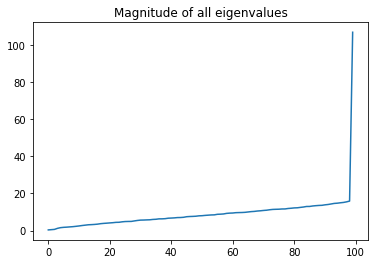

In [29]:
#There's a sudden spike In Eigenvalues, plotting it here
plt.plot(eigB)
plt.title("Magnitude of all eigenvalues")
plt.show()


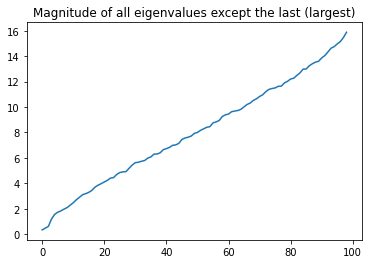

In [30]:
#Plotting without the last eigenvalue
plt.plot(eigB[0:99])
plt.title("Magnitude of all eigenvalues except the last (largest)")
plt.show()

In [31]:
eigB[:10]

array([0.33373699, 0.47346719, 0.61204081, 1.18421189, 1.55374703,
       1.72607991, 1.82695389, 1.96535104, 2.087566  , 2.27289382])

In [32]:
#Picking sigma to be uniformly distributed between 3 and 11

sigma = np.linspace(0,2,sigma_n )
print(sigma)

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


In [33]:
#Generate the random vector
s = np.random.normal(0, 1, 100)

norm=math.sqrt(sum(s*s))
S=s/norm


In [34]:
#Creating Vi
print("For a symmetric matrix B")

V = np.zeros((sigma_n,100))
V_minres = np.zeros((sigma_n,100))
for i in range(sigma_n):
    V[i] = np.dot(np.linalg.inv(sigma[i]*np.eye(100) - B),S)
    V_minres[i], exitcode = minres((sigma[i]*np.eye(100) - B), S, maxiter = maxit, tol = np.float32(1e-9))
    
for i in range(sigma_n):
    print("\nSigma = ", sigma[i])
    print("Maximal difference between any component of Vi calculated by MINRES, and that calculated by the exact solver = ", max(abs(V_minres[i] - V[i])))
    print("Smallest Component in V (exact) = ", min(abs(V[i])))
    print("Median Component by magnitude in V (exact) = ", np.median(np.sort(abs(V[i]))))
    print("Exitcode = ", exitcode)

print("\n\nFor an asymmetric matrix C")

del_B = np.random.rand(100,100)

C = B + eta*del_B
V = np.zeros((sigma_n,100))

eigC = np.linalg.eigvals(C)
idxC = np.argsort(eigC)
eigC = eigC[idxC]


V_minres = np.zeros((sigma_n,100))
for i in range(sigma_n):
    V[i] = np.dot(np.linalg.inv(sigma[i]*np.eye(100) - C),S)
    V_minres[i], exitcode = minres((sigma[i]*np.eye(100) - C), S, maxiter = maxit, tol = np.float32(1e-9))
    
for i in range(sigma_n):
    print("\nSigma = ", sigma[i])
    print("Maximal difference between any component of Vi calculated by MINRES, and that calculated by the exact solver = ", max(abs(V_minres[i] - V[i])))
    print("Smallest Component in V (exact) = ", min(abs(V[i])))
    print("Median Component by magnitude in V (exact) = ", np.median(np.sort(abs(V[i]))))
    print("Exitcode = ", exitcode)

# V_minres = np.zeros((5,100))
# for i in range(5):
#     V_minres[i] = minres(sigma[i]*np.eye(100) - B,S)


# print(V_minres.shape)




For a symmetric matrix B



Sigma =  0.0
Maximal difference between any component of Vi calculated by MINRES, and that calculated by the exact solver =  5.887340897778315e-09
Smallest Component in V (exact) =  0.00015856367477746006
Median Component by magnitude in V (exact) =  0.040948070424067534
Exitcode =  0

Sigma =  0.2222222222222222
Maximal difference between any component of Vi calculated by MINRES, and that calculated by the exact solver =  1.7755889591963836e-08
Smallest Component in V (exact) =  0.0010465256574451222
Median Component by magnitude in V (exact) =  0.10974982947654939
Exitcode =  0

Sigma =  0.4444444444444444
Maximal difference between any component of Vi calculated by MINRES, and that calculated by the exact solver =  1.3298183573762223e-07
Smallest Component in V (exact) =  0.023617684925638205
Median Component by magnitude in V (exact) =  0.3289624432644169
Exitcode =  0

Sigma =  0.6666666666666666
Maximal difference between any component of Vi calculated by MINRES, and that calcul

In [35]:
print("Sigma = ", sigma[1])
print("\nVi by exact solver = ", V[1])
print("\nVi by MINRES = ", V_minres[1])
print("\nThe Vi(regular) - Vi(MINRES) = ", V[1] - V_minres[1])

Sigma =  0.2222222222222222

Vi by exact solver =  [ 0.16126878 -0.06234781 -0.12720765  0.25474769  0.40284752 -0.22552972
 -0.01617167  0.41263995 -0.31391133 -0.02008534 -0.27627839  0.18255295
  0.02850538  0.25179014  0.39430684  0.03977948  0.05766824 -0.16817878
  0.37192447 -0.17575988 -0.06685139 -0.0572278  -0.02285757 -0.26528678
  0.12551913 -0.34006024  0.53781321 -0.14969102  0.01243866  0.3043448
 -0.06424481  0.06275165  0.29904565  0.09495903 -0.11432686 -0.16706634
  0.18894773 -0.36664427 -0.21545644 -0.29649132  0.32238506  0.41503777
 -0.19831763 -0.1054609  -0.30150714  0.09843952  0.21108022 -0.14613298
 -0.3323876   0.09690394  0.00215701  0.22166332 -0.32030946  0.12843586
  0.22834461  0.12651643 -0.0061168  -0.19993781 -0.0580715  -0.05673657
  0.00921222  0.15523941  0.44671121 -0.28603937 -0.35402913  0.07120581
 -0.05306144 -0.2340756   0.31800697 -0.09266248  0.11776324  0.09325651
 -0.05588566  0.15943426 -0.1541555   0.06317684 -0.11124314  0.05223789
 

In [36]:
#Creating the H and S matrices
Hmatrix = np.ones((sigma_n,sigma_n))
Smatrix = np.ones((sigma_n,sigma_n))

Hmatrix_minres = np.ones((sigma_n,sigma_n))
Smatrix_minres = np.ones((sigma_n,sigma_n))

matrix = C

for i in range(sigma_n):
    for j in range(sigma_n):
        Hmatrix[i,j]= np.dot(V[i],np.dot(matrix,V[j]))
        Hmatrix_minres[i,j]= np.dot(V_minres[i],np.dot(matrix,V_minres[j]))
        Smatrix[i,j] = np.dot(V[i],V[j])
        Smatrix_minres[i,j] = np.dot(V_minres[i],V_minres[j])


print(Hmatrix.shape)
print(Smatrix.shape) 
     

(10, 10)
(10, 10)


In [37]:
eigvals, eigvecs = scipy.linalg.eigh(Hmatrix, b = Smatrix,eigvals_only=False)
eigvals_minres, eigvecs_minres = scipy.linalg.eigh(Hmatrix_minres, b = Smatrix_minres,eigvals_only=False)
print("The sigma values are - ", sigma)
print("Exact Solver : Solved eigenvalues - ", eigvals)
print("MINRES : Solved eigenvalues - ", eigvals_minres)
print("Std. Solver's e-values - MINRES e-values = ", eigvals - eigvals_minres)
#print("The Symmetric Matrix B's eigenvalues between 0 to 2 are : ", eigB[:8])
print("The Matrix C's eigenvalues between 0 to 2 are : ", eigC[:8])
#eigvalMINRES, exitcode = minres(Hmatrix, Smatrix)


The sigma values are -  [0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
Exact Solver : Solved eigenvalues -  [-7.63360601e+02 -1.70112389e+00  3.28318164e-01  4.85436364e-01
  6.56383958e-01  1.20829610e+00  1.56798856e+00  1.80282402e+00
  1.96046844e+00  5.09201512e+00]
MINRES : Solved eigenvalues -  [-5.42547768e+02 -7.51695927e+00  3.18938681e-01  4.74594222e-01
  6.33647846e-01  1.20125734e+00  1.57718542e+00  1.79987555e+00
  1.96197825e+00  5.04468096e+00]
Std. Solver's e-values - MINRES e-values =  [-2.20812832e+02  5.81583538e+00  9.37948246e-03  1.08421416e-02
  2.27361122e-02  7.03875996e-03 -9.19685835e-03  2.94847646e-03
 -1.50981763e-03  4.73341641e-02]
The Matrix C's eigenvalues between 0 to 2 are :  [0.30600681+0.j 0.47116611+0.j 0.62145712+0.j 1.20037851+0.j
 1.56333869+0.j 1.78680822+0.j 1.80685972+0.j 1.9473276 +0.j]


In [38]:
print("Eigenvalues from Filter Diagonalization: ", eigvals)
print("Sigma values: ", sigma)
#print("Eigenvalues from MINRES: ", eigvalMINRES)

Eigenvalues from Filter Diagonalization:  [-7.63360601e+02 -1.70112389e+00  3.28318164e-01  4.85436364e-01
  6.56383958e-01  1.20829610e+00  1.56798856e+00  1.80282402e+00
  1.96046844e+00  5.09201512e+00]
Sigma values:  [0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


In [39]:
print(eigB)
#List of all eigenvalues of the matrix

[  0.33373699   0.47346719   0.61204081   1.18421189   1.55374703
   1.72607991   1.82695389   1.96535104   2.087566     2.27289382
   2.47037955   2.70279968   2.89906721   3.09994535   3.18396476
   3.28895796   3.44306808   3.69624048   3.85397625   3.97047676
   4.10644121   4.23291561   4.4127341    4.45099383   4.69455336
   4.84833717   4.89845029   4.92050006   5.18707219   5.44006348
   5.62351793   5.65888651   5.73612137   5.79277473   5.983739
   6.0760327    6.29615149   6.30593053   6.40145332   6.64825272
   6.72824906   6.82714703   6.98807567   7.02059394   7.14289086
   7.45342345   7.56423316   7.62769136   7.71984976   7.92988824
   8.00133811   8.16581597   8.29038058   8.40728253   8.45628233
   8.75517906   8.82800237   8.94413846   9.25219233   9.38643532
   9.45017536   9.63324972   9.6854013    9.72742607   9.82057737
  10.01647138  10.20397175  10.3186491   10.52356925  10.64927935
  10.82906055  10.96374702  11.2102789   11.38658649  11.45616698
  11.5032859

## Using MINRES  
M is a symmetric 100x100 matrix with positive eigenvalues  
$v_i = (\sigma _iI - M)^{-1}s -$   where s is the arbitrary starting vector  
$H_{ij} = v_i^TMv_j$  
$S_{ij} = v_i^Tv_j$  
$Hv = \lambda Sv$  
$S^{-1}Hv = \lambda v$  
Cases:
##### M is symmetric
1. v is an arbitrary vector
2. v is an eigenvector of the 100x100 symmetric matrix, outside the window of sigma value
3. v is an eigenvector of the 100x100 symmetric matrix, with the eigenvector corresponding to an eigenvalue near to one of the sigma's

All this will yield $\lambda$

##### M is asymmetric
Repeat the above

In [40]:
# #M is symmetric

# #v is a random vector
# v = np.random.rand(sigma_n)
# v = v/np.linalg.norm(v)
# eigvalMINRES, exitcode = minres((np.matmul(np.linalg.inv(Smatrix), Hmatrix)), v)
# print("\nv is a random vector\n")
# print("The x solved for by MINRES - ", eigvalMINRES)
# print("The random vector b chosen for Ax = b in MINRES - ", v)
# print("The x solved by MINRES divided element wise by b - ", eigvalMINRES/v)
# print("Exitcode for MINRES - ", exitcode)

# #v is an eigenvector of (H,S)
# print("\n v is an eigenvector of the generalized equation involvong H and S\n")
# eigvals, eigvecs = scipy.linalg.eigh(Hmatrix, b = Smatrix,eigvals_only=False)
# v = eigvecs[2]

# eigvalMINRES, exitcode = minres((np.matmul(np.linalg.inv(Smatrix), Hmatrix)), v)

# print("The x solved for by MINRES - ", eigvalMINRES)
# print("The eigenvector chosen as b for Ax = b in MINRES - ", v)
# print("The corresponding eigenvalue for this eigenvector = ", eigvals[2])
# print("The corresponding sigma value - ", sigma[2])
# print("The x solved by MINRES divided element wise by b - ", eigvalMINRES/v)

# print("Exitcode for MINRES - ", exitcode)




In [41]:
# # M has a slight asymmetry
# del_B = np.random.rand(100,100)
# eta = 0.01
# C = B + eta*del_B
# eigC = np.linalg.eigvals(C)
# idxC = np.argsort(eigC)
# eigC = eigC[idxC]
# print("The smallest eigenvectors in the matrix after adding a small asymmetric perturbation", eigC[:10])
# # we have verified that the smallest eigenvalue is real, and positive

# #Npw, build the H and S matrices for this
# #Initialize the starting vector
# s = np.random.normal(0, 1, 100)

# norm=math.sqrt(sum(s*s))
# S=s/norm


# #Creating Vi
# V = np.zeros((sigma_n,100))
# for i in range(sigma_n):
#     V[i] = np.dot(np.linalg.inv(sigma[i]*np.eye(100) - C),S)

# print("V calculated")

# #Creating the H and S matrices
# Hmatrix = np.ones((sigma_n,sigma_n))
# Smatrix = np.ones((sigma_n,sigma_n))

# for i in range(sigma_n):
#     for j in range(sigma_n):
#         Hmatrix[i,j]= np.dot(V[i],np.dot(B,V[j]))
#         Smatrix[i,j] = np.dot(V[i],V[j])

# print("H matrix calculated")
# print("S matrix calculated\n")

# #M is asymmetric

# #v is a random vector
# v = np.random.rand(sigma_n)
# v = v/np.linalg.norm(v)
# eigvalMINRES, exitcode = minres((np.matmul(np.linalg.inv(Smatrix), Hmatrix)), v)
# print("\nv is a random vector\n")
# print("The x solved for by MINRES - ", eigvalMINRES)
# print("The random vector b chosen for Ax = b in MINRES - ", v)
# print("The x solved by MINRES divided element wise by b - ", eigvalMINRES/v)
# print("Exitcode for MINRES - ", exitcode)

# #v is an eigenvector of (H,S)
# print("\nv is an eigenvector of the generalized equation involvong H and S\n")
# eigvals, eigvecs = scipy.linalg.eigh(Hmatrix, b = Smatrix,eigvals_only=False)
# v = eigvecs[2]

# eigvalMINRES, exitcode = minres((np.matmul(np.linalg.inv(Smatrix), Hmatrix)), v)
# print("The x solved for by MINRES - ", eigvalMINRES)
# print("The eigenvector chosen as b for Ax = b in MINRES - ", v)
# print("The corresponding eigenvalue for this eigenvector = ", eigvals[2])
# print("The corresponding sigma value - ", sigma[2])
# print("The x solved by MINRES divided element wise by b - ", eigvalMINRES/v)

# print("Exitcode for MINRES - ", exitcode)


## Conclusions
#### Nature of Convergence
* The algorithm appears to generate eigenvalues of the symmetric positive eigenvalue matrix. How do I minimize the computational error?
* One of the sigma's was 6.5, and the closest eigenvalue was 6.476, but the algorithm seemed to converge towards not the next (6.42), but the 3rd closest eigenvalue - 6.59, and terminated at 6.54. Why?
* A probable reason for the above is that nearby eigenvalues seems to confuse the algo a bit; in other cases, wherein closest eigenvalues to each sigma value were quite far apart, the FD algorithm correctly picked the nearest eigenvalue to converge at
* VERY COOL - I've begun to appreciate what the work will lead to.

#### Odd eigenvalue
Surprisingly the last eigenvalue was much larger than expected, as the values of the previous 99 seemed to increase smoothly. What factors can cause such sudden spikes in eigenvalue magnitude?

In [42]:
print(eigC[:10])

[0.30600681+0.j 0.47116611+0.j 0.62145712+0.j 1.20037851+0.j
 1.56333869+0.j 1.78680822+0.j 1.80685972+0.j 1.9473276 +0.j
 2.12611284+0.j 2.31197843+0.j]
